از فصل 2 برای تمرین و یادگیری

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
house = pd.read_csv("housing.csv" , low_memory=False)
house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
!pip install scikit-learn


     ---------------------------------------- 8.2/8.2 MB 106.1 kB/s eta 0:00:00
     -------------------------------------- 40.1/40.1 MB 166.6 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 107.1 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
house["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


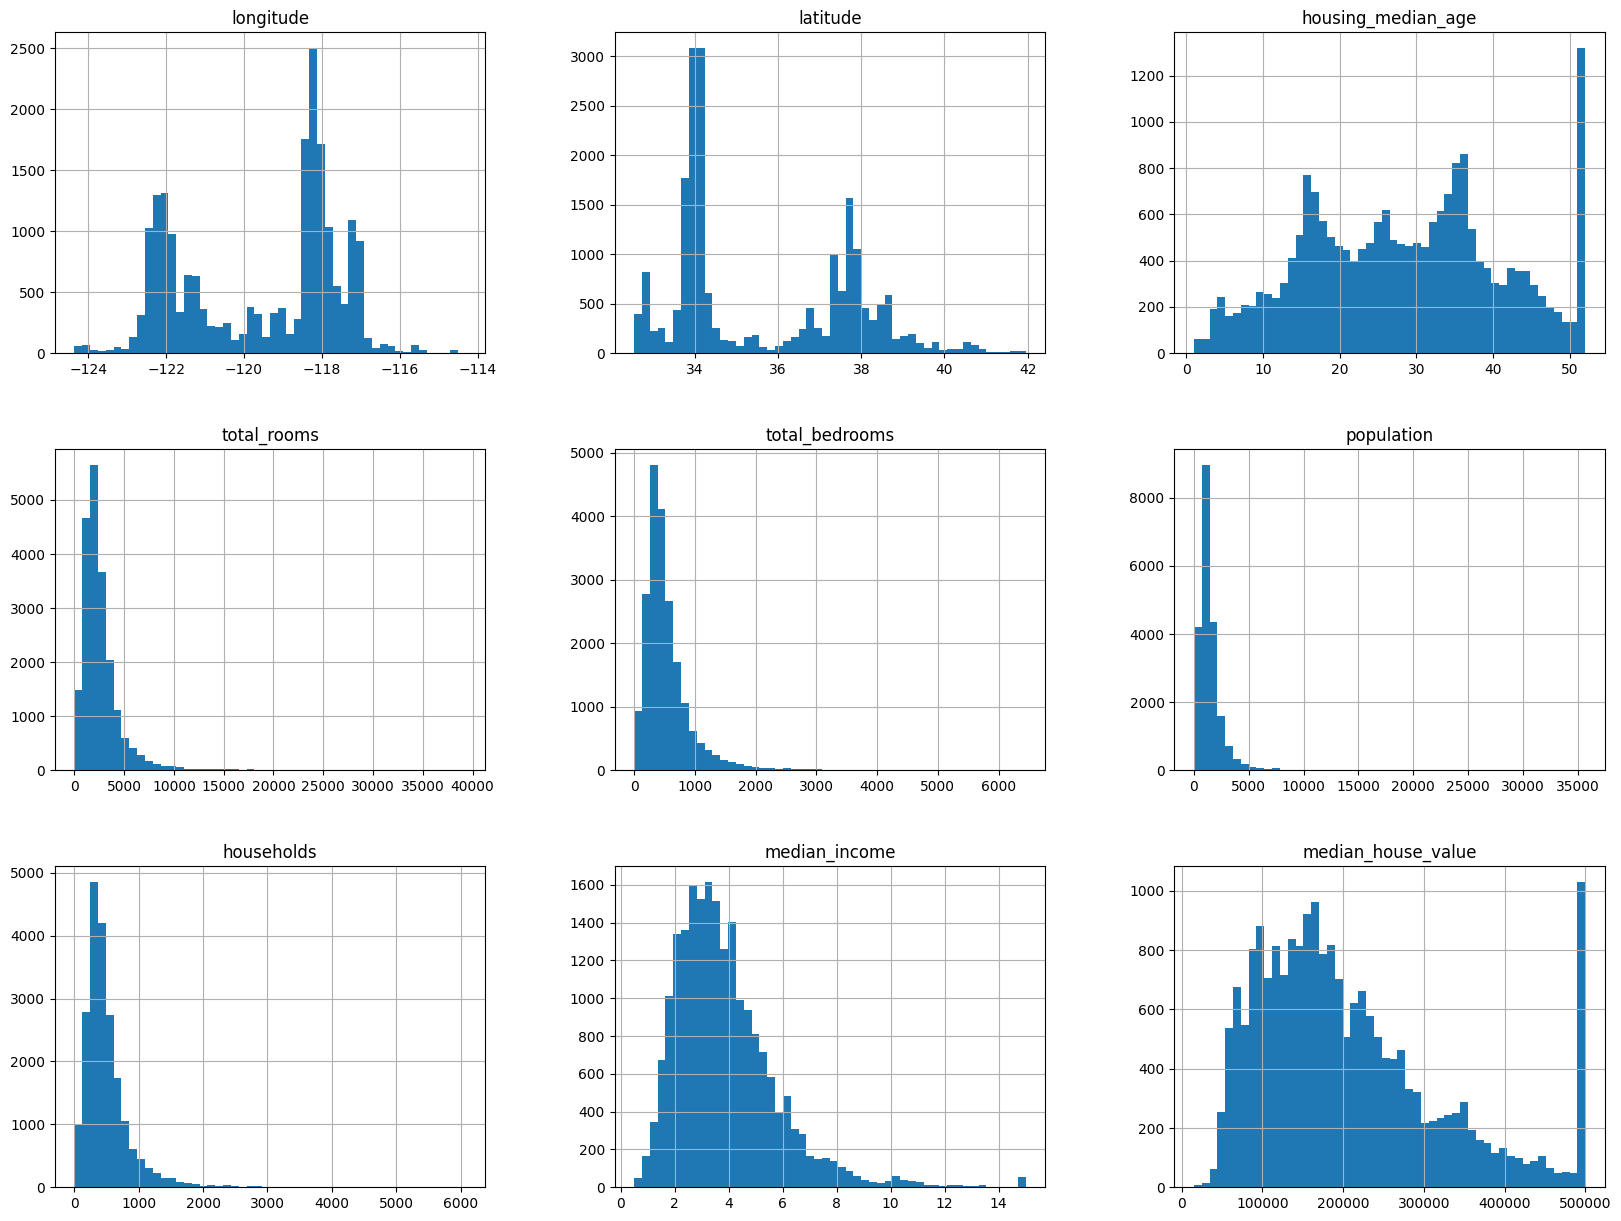

In [8]:
house.hist(bins=50, figsize=(20,15))
plt.show()

In [27]:
shuffled_indices = np.random.permutation(len(house))
shuffled_indices

array([19408, 18117, 19718, ...,  5879,   573,  3525])

In [28]:
shuffled_indices.shape

(20640,)

یه آرایه از طول داده به صورت رندوم درست کردیم

In [29]:
test_set_size = int(len(house) * 0.2)
test_set_size 

4128

تعداد دادهها ی تست 

In [30]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [56]:
test_indices = shuffled_indices[:4128]
test_indices

array([17527, 17242, 15448, ...,  4931,  1274, 17473])

داده ترین و تست ایجاد کردیم

In [14]:
train_set, test_set = split_train_test(house, 0.2)
len(train_set)

16512

In [15]:
len(test_set)


4128

<AxesSubplot: >

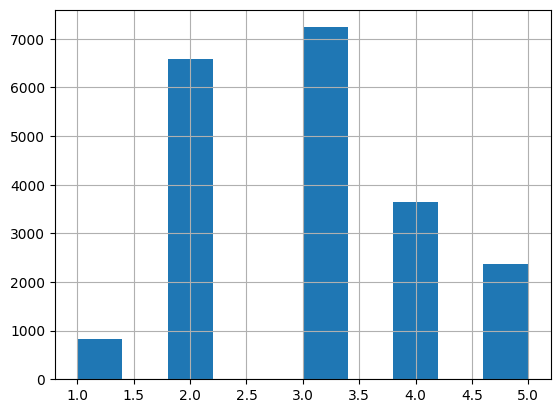

In [31]:
house["income_cat"] = pd.cut(house["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])
house["income_cat"].hist()

In [32]:
house["income_cat"] 

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

به 5 گروه تقسیم کردیم براساس درآمد و هر کدوم تویه چه گروهیه

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(house, house["income_cat"]):
    strat_train_set = house.loc[train_index]
    strat_test_set = house.loc[test_index]


In [34]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [35]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [36]:
 strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [37]:
 strat_test_set["income_cat"].value_counts() / len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [38]:
strat_train_set["income_cat"].value_counts() / len(strat_test_set)

3    1.402374
2    1.275436
4    0.705184
5    0.457849
1    0.159157
Name: income_cat, dtype: float64

تعدادی که در هر دسته داریم تقسیم به کل طول دیتا کردیم در واقع تعداد کل دسته ها که با این کار نسبت درآمد هر دسته به دست اومد

In [39]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


In [46]:
set_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


income_cat رو حذف کردیم تا داده واقعی رو داشته باشیم

In [71]:
house = strat_train_set.copy()


کپی از ترین ست

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

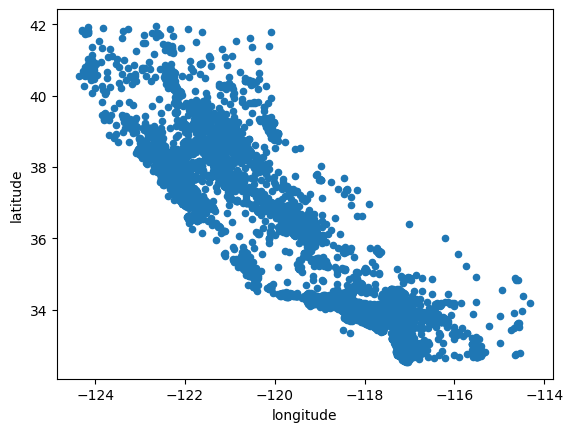

In [66]:
house.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

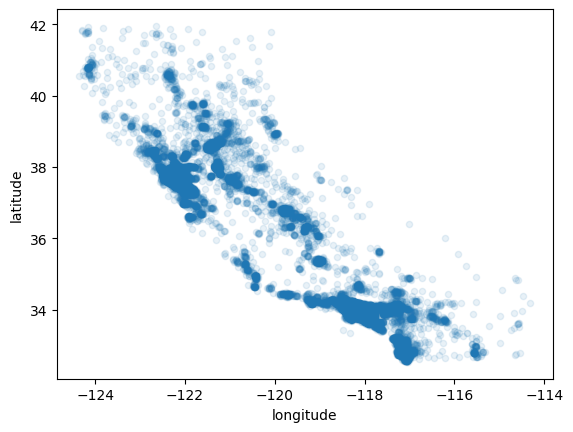

In [67]:
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

با تنظیم آلفا نقاطی که متراکم تر بودن پررنگ شد

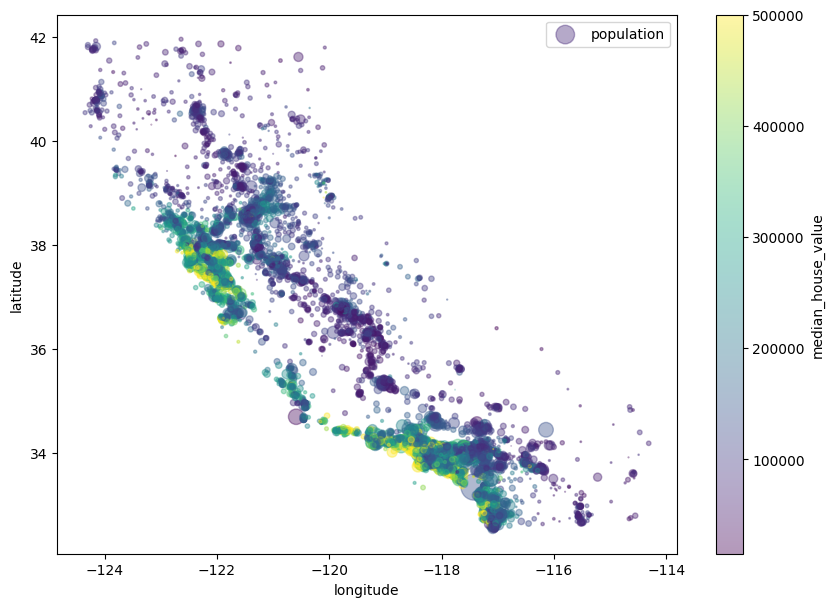

In [74]:
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=house["population"]/100, label="population", figsize=(10,7),
 c="median_house_value"), #cmap=plt.get_cmap("jet"), colorbar=True,)

plt.legend()


In [76]:
corr_matrix = house.corr()


C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_3532\386554772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = house.corr()


In [77]:
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

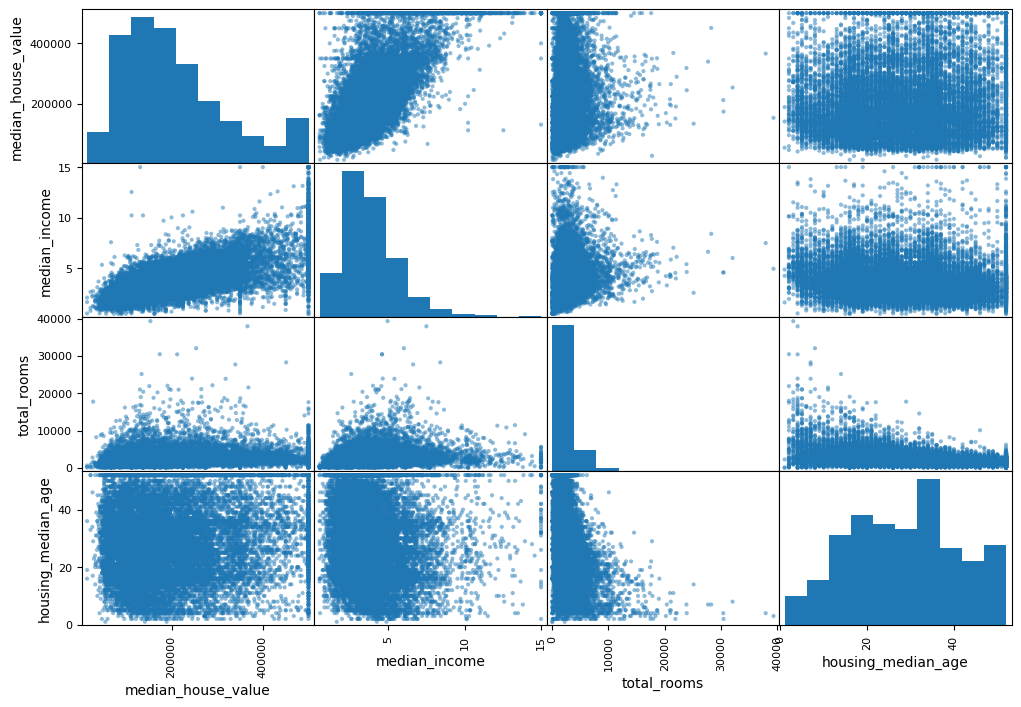

In [79]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(house[attributes], figsize=(12, 8))

هر ویژگی عددی با بقیه مقایسه شده

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

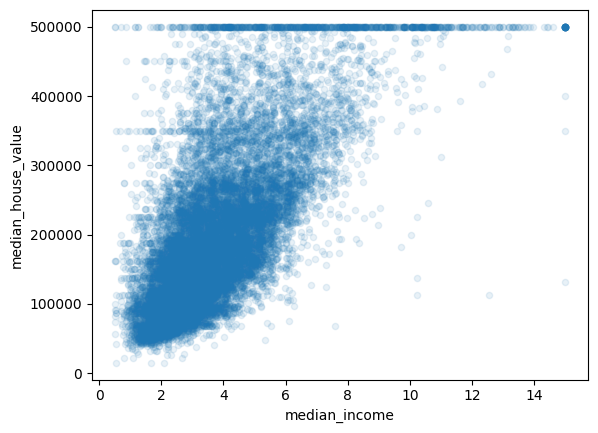

In [80]:
house.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [81]:
house["rooms_per_household"] = house["total_rooms"]/house["households"]
house["bedrooms_per_room"] = house["total_bedrooms"]/house["total_rooms"]
house["population_per_household"]=house["population"]/house["households"]

سه ویژگی جدید ایجاد کردیم

In [83]:
corr_matrix = house.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_3532\2083503933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = house.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

دوباره کرولیشن با ویژگی جدید میگیریم

Prepare the Data for Machine Learning Algorithms

In [85]:
house = strat_train_set.drop("median_house_value", axis=1)
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [86]:
house_labels = strat_train_set["median_house_value"].copy()

In [90]:
house.dropna(subset=["total_bedrooms"])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [41]:
house.drop("total_bedrooms", axis=1) 
median = house["total_bedrooms"].median()
house["total_bedrooms"].fillna(median, inplace=True)

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [49]:
house_num = house.drop("ocean_proximity", axis=1)

In [50]:
imputer.fit(house_num)

SimpleImputer(strategy='median')

In [51]:
imputer.statistics_


array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  3.0000e+00])

In [52]:
 house_num.median().values

C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_10224\2031814861.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_num.median().values


array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [53]:
house_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [54]:
X = imputer.transform(house_num)

In [55]:
housing_tr = pd.DataFrame(X, columns=house_num.columns,
 index=house_num.index)


In [56]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.0


In [57]:
 imputer.strategy

'median'

In [58]:
house_cat = house[["ocean_proximity"]]
house_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


تعداد؟

In [59]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
house_cat_encoded = ordinal_encoder.fit_transform(house_cat)
house_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

????

In [60]:
 ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [61]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
house_cat_1hot = cat_encoder.fit_transform(house_cat)
house_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [62]:
house_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [115]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [66]:
df = pd.read_csv("housing.csv" , low_memory=False)

In [80]:
df.dropna(inplace=True)

In [81]:
X = df.iloc[:, :-2].values
y = df.iloc[:,-2].values
X.shape

(20433, 8)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=85, )
X_train.shape

(14303, 8)

In [83]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression intercept boston: ", lr_model.intercept_)
print("Linear Regression coef boston: ", lr_model.coef_)

Linear Regression intercept boston:  -3627244.1477539865
Linear Regression coef boston:  [-4.32910029e+04 -4.31532098e+04  1.15739406e+03 -7.51234805e+00
  1.06695627e+02 -4.41005814e+01  6.55438213e+01  3.99669066e+04]


In [84]:
rb_model = Ridge(alpha=0.9)
rb_model.fit(X_train, y_train)
print("Ridge intercept : ", rb_model.intercept_)
print("Ridge coef : ", rb_model.coef_)

Ridge intercept :  -3626366.815207999
Ridge coef :  [-4.32807368e+04 -4.31436110e+04  1.15755847e+03 -7.51326081e+00
  1.06682703e+02 -4.41009148e+01  6.55658436e+01  3.99675005e+04]


In [85]:
from sklearn.pipeline import make_pipeline
sgr_model = make_pipeline(preprocessing.StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgr_model.fit(X_train, y_train)
print("SGD intercept : ", sgr_model[1].intercept_)
print("SGD coef : ", sgr_model[1].coef_)
print("iterations : ", sgr_model[1].n_iter_)

SGD intercept :  [205697.44482357]
SGD coef :  [-86278.25445695 -91837.44607648  13255.28870975 -16280.27199064
  44331.60498778 -48823.03540975  26376.57956148  74882.12211329]
iterations :  22


In [86]:
from sklearn.preprocessing import PolynomialFeatures
print("before: ", X_train.shape)
polyRegressor = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = polyRegressor.fit_transform(X_train)
print("after: ", X_train_poly.shape)
X_test_poly = polyRegressor.fit_transform(X_test)
poly = LinearRegression()
poly.fit(X_train_poly, y_train)
prediction_plr = poly.predict(X_test_poly)

before:  (14303, 8)
after:  (14303, 44)


In [88]:
y_predict_lr= lr_model.predict(X_test)

<AxesSubplot: ylabel='Count'>

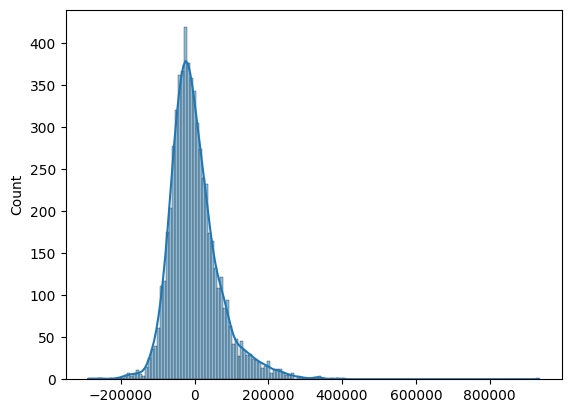

In [89]:
sns.histplot(y_test - y_predict_lr, kde=True)

In [92]:
from sklearn import metrics
import math

print("MSE LinearRegression: ", metrics.mean_squared_error(y_test, y_predict_lr))
print("R2_SCORE LinearRegression: ", metrics.r2_score(y_test, y_predict_lr))
print("MAPE LinearRegression: ", metrics.mean_absolute_percentage_error(y_test, y_predict_lr))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / df["median_house_value"].mean()

MSE LinearRegression:  4910655372.211615
R2_SCORE LinearRegression:  0.6286141932701607
MAPE LinearRegression:  0.30505407140099433


0.338753618378165

In [95]:
y_predict_rr= rb_model.predict(X_test)

print("MSE RidgeRegression: ", metrics.mean_squared_error(y_test, y_predict_rr))
print("R2_SCORE RidgeRegression: ", metrics.r2_score(y_test, y_predict_rr))
print("MAPE RidgeRegression: ", metrics.mean_absolute_percentage_error(y_test, y_predict_rr))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_rr)) / df["median_house_value"].mean()

MSE RidgeRegression:  4910638937.035009
R2_SCORE RidgeRegression:  0.6286154362389417
MAPE RidgeRegression:  0.30505060197695205


0.33875305150065277

<AxesSubplot: ylabel='Count'>

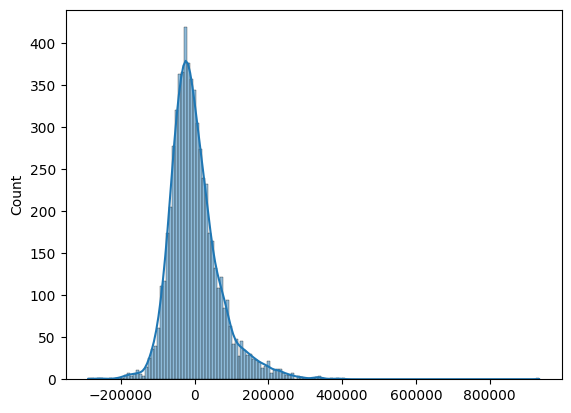

In [96]:
sns.histplot(y_test - y_predict_rr, kde=True)

In [97]:
from sklearn.model_selection import cross_val_score as cvs

In [99]:
accuracy_lr = cvs(LinearRegression(), X_train, y_train, scoring='r2', cv=10)
accuracy_rb = cvs(Ridge(), X_train, y_train, scoring='r2', cv=10)
accuracy_sgd = cvs(SGDRegressor(), X_train, y_train, scoring='r2', cv=6)
print("cross val mean LR:", accuracy_lr.mean())
print("cross val mean Ridge:", accuracy_rb.mean())
print("cross val mean SGD:", accuracy_sgd.mean())

cross val mean LR: 0.6381357372931139
cross val mean Ridge: 0.6381357274351813
cross val mean SGD: -6.834508514546789e+20
